
# Segmentação de Clientes - Departamento de Marketing

###Entendimento do Negócio


.

Desenvolveremos a segmentação de clientes de um banco, em pelo menos 4 grupos, para definir melhores estratégias de marketing de acordo com cada perfil. Utilizaremos nesse projeto a técnica de agrupamento (clustering) com o algoritmo K-Means, para agrupar esses clientes de acordo com características parecidas.

.

O conjunto de dados de amostra resume o comportamento de uso de cerca de 9.000 titulares de cartão de crédito ativos durante os últimos 6 meses. O arquivo está no nível do cliente com 18 variáveis ​​comportamentais.

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata

.

A seguir está o dicionário de dados para o conjunto de dados do cartão de crédito:

.

**CUST_ID:** Identificação do cliente

**BALANCE:** Saldo para fazer compras

**BALANCE_FREQUENCY:** Com que frequência o Saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)

**PURCHASES:** Quantidade de compras realizadas

**ONEOFF_PURCHASES:** Quantidade de compras feitas à vista

**INSTALLMENTS_PURCHASES:** Quantidade de compras parceladas

**CASH_ADVANCE:** Dinheiro adiantado

**PURCHASES_FREQUENCY:** Frequência das compras, entre 0 e 1 (1 = comprado com frequência, 0 = não comprado com frequência)

**ONEOFF_PURCHASES_FREQUENCY:** Frequência de compras à vista (1 = comprado com frequência, 0 = não comprado com frequência)

**PURCHASES_INSTALLMENTS_FREQUENCY:** Frequência de compras parceladas (1 = frequentemente feito, 0 = não feito com frequência)

**CASH_ADVANCE_FREQUENCY:** Frequência de saques de dinheiro adiantado

**CASH_ADVANCE_TRX:** Número de transações feitas com "Cash in Advanced"

**PURCHASES_TRX:** Número de compras

**CREDIT_LIMIT:** Limite do cartão de crédito

**PAYMENTS:** Valor pago

**MINIMUM_PAYMENTS:** valor mínimo pago

**PRC_FULL_PAYMENT:** Percentual de pagamentos da fatura "completa"

**TENURE:** Posse do titular do cartão

## Importação das bibliotecas e base de dados


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
creditcard_df = pd.read_csv('/content/CC GENERAL.csv')

Começamos vendo o tamanho dessa base:

In [ ]:
creditcard_df.shape

(8950, 17)

Agora, vamos visualizar as colunas (atributos) retornando apenas as primeiras linhas :

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Obtendo mais informações sobre essa base de dados :

In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Visualizamos as colunas e a quantidade de linhas sem valores nulos (non-null count) e os tipos (Dtype) de cada uma.


Iremos analisar abaixo as estatísticas desses dados:

In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Acima conseguimos ver, por exemplo, que:
- $1.564 é a **média** que os clientes costumam manter na conta corrente para comprar no débito

- A **média de atualização** no saldo da conta corrente para fazer compras é de 0.87

- A **média do valor de compras** é de $1.003

- E mais para o final percebemos um dado interessante, que a **média das pessoas que pagam o valor completo da fatura é de apenas 0.15 (15%)**


Outro dado também interessante é que o **maior valor de compra a vista que um cliente fez** foi de $40.761. Então iremos buscar informações mais detalhadas sobre esse cliente em específico:

In [ ]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


Tendo em mãos os detalhes desse cliente com o **maior valor de compra à vista**, podemos **comparar** com o cliente com o **maior valor de saque do cartão de crédito**:

In [ ]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [ ]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


Podemos notar que esses 2 clientes:

- Costumam **manter na conta corrente valores semelhantes** para compras

- Possuem a **mesma frequência de compras**

- Já no **valor de compras, há uma grande diferença**

- Em relação à **frequência de saques**, vemos que o segundo cliente tem **maior tendência a sacar o dinheiro do cartão de crédito**, assim como ele também **realizou mais vezes transações para sacar o dinheiro da conta**

Então aqui já notamos que temos 2 tipos de clientes diferentes e que podem formar possíveis grupos de segmentação.

# Visualização e exploração dos dados

Analisando se temos registros nulos na nossa base.

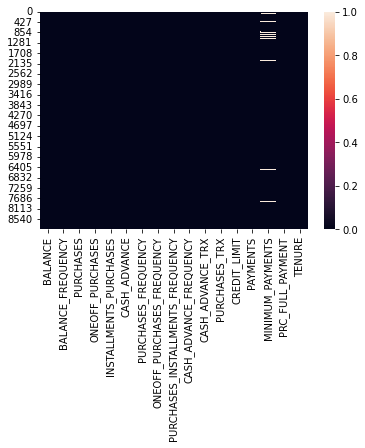

In [ ]:
sns.heatmap(creditcard_df.isnull())

Notamos, através das barrinhas brancas, que possuímos alguns valores nulos no atributo 'MINIMUM_PAYMENTS'.



---



Consultando a quantidade de elementos nulos existentes na base :

In [ ]:
creditcard_df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Agora é preciso tratar esses dados, preenchendo esses valores nulos, para não gerar erro no algoritmo. 

Vamos substituir os valores nulos pela média dos valores do atributo. Começando pelo 'MINIMUM_PAYMENTS' :

In [ ]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [ ]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

Agora o 'CREDIT_LIMIT' :

In [ ]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [ ]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

Conferindo se funcionou corretamente :

In [ ]:
creditcard_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

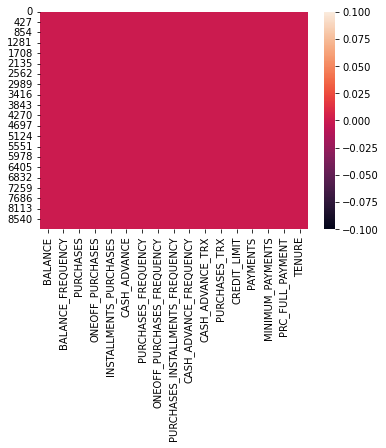

In [ ]:
sns.heatmap(creditcard_df.isnull())

Com os valores nulos tratados, é importante conferir se há valores repetidos na base :

In [ ]:
creditcard_df.duplicated().sum()

0

Tudo certo.


---


E como o atributo 'CUST_ID' (identificador do cliente) não é relevante para fazer o agrupamento, iremos excluí-lo da base :

In [ ]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Para começarmos então a visualizar os dados, criaremos um histograma para cada uma das colunas :

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
len(creditcard_df.columns)

17

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

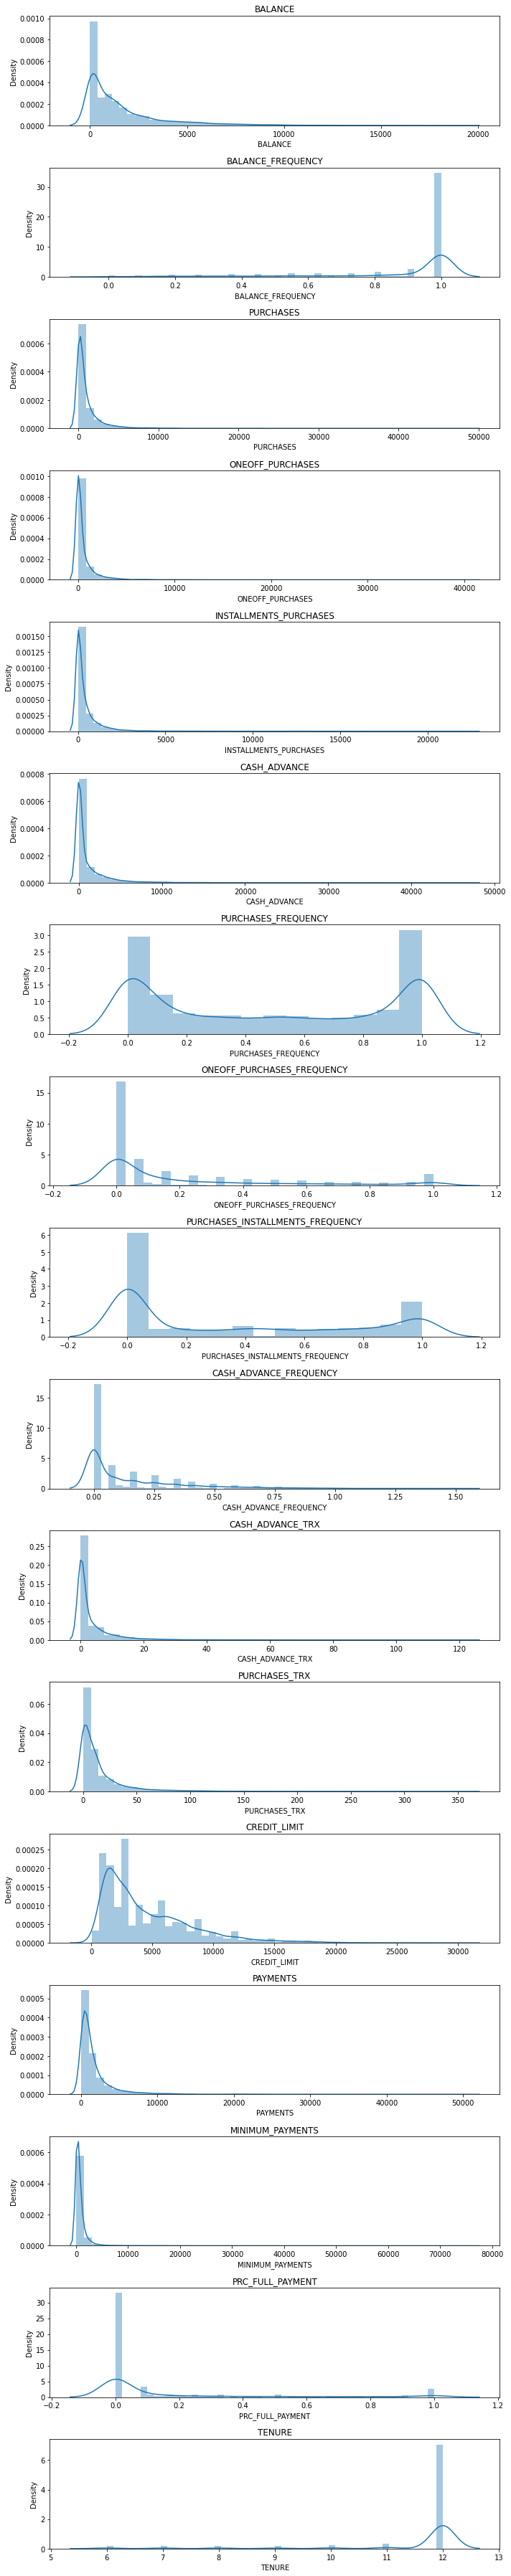

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

Visualizando os gráficos gerados de cada coluna, respectivamente, notamos que:

- A frequência/quantidade de clientes diminui conforme o valor do saldo na conta corrente aumenta, concluindo que poucos tem um saldo acima de $5.000

- Os clintes atualizam o saldo da conta corrente com muita frequência

- O valor gasto nas transações gira entorno de $1.000 - 5.000, sendo poucas as que passam desse valor

- O valor das compras à vista e das compras à prazo (parceladas) seguem uma distribuição dos dados parecida, estando a diferença na escala dos valores:
    - Em compras parceladas vemos valores mais frequentes na faixa dos $1.000 - 5.000, ou até menos
    - Em compras à vista vemos valores mais frequentes entre $1.000 - 10.000, ou menos também

- O valor utilizado do cartão de crédito também é visto com maior frequência na escala de $1.000 - 10.000, tendo até uma frequência maior nesse intervalo do que as compras feitas à vista

- Com relação à frequência de compras, vemos que há muitos clientes que não fazem compras ou fazem poucas compras no cartão de crédito e clientes que compram muito no cartão de crédito
  ** ***Aqui já podemos analisar 2 grupos clientes: os que usam muito o cartão de crédito e os que praticamente não usam o cartão de crédito***

- Sobre a relação da frequência de compras à vista e parceladas, notamos que ambas possuem uma baixa frequência, destacando que a frequência de compras à prazo é um pouco superior à de compras à vista.

- A frequência com que os valores utilizados no cartão de crédito estão sendo pagos é baixa

- O número total de transações feitas no cartão de crédito se encontra na faixa de até 20

- O número de transações feitas para compras se encontra com maior frequência entre 0 e 50

- O limite do cartão de crédito, como vimos anteriormente, tem sua média em $4.494

- Valor dos pagamentos das faturas entre $0 - 5.000

- Valor dos pagamentos mínimos da fatura entre $0 e 5.000 também

- Poucos clientes pagam a fatura do cartão completa

- E, para finalizar, a maioria desses clientes estão com a conta aberta nesse banco entorno de 12 anos



---


Com alguns insights já extraídos dos histogramas de cada um dos atributos, vamos ver o quanto um atributo está relacionado ao outro :

In [ ]:
correlations = creditcard_df.corr()

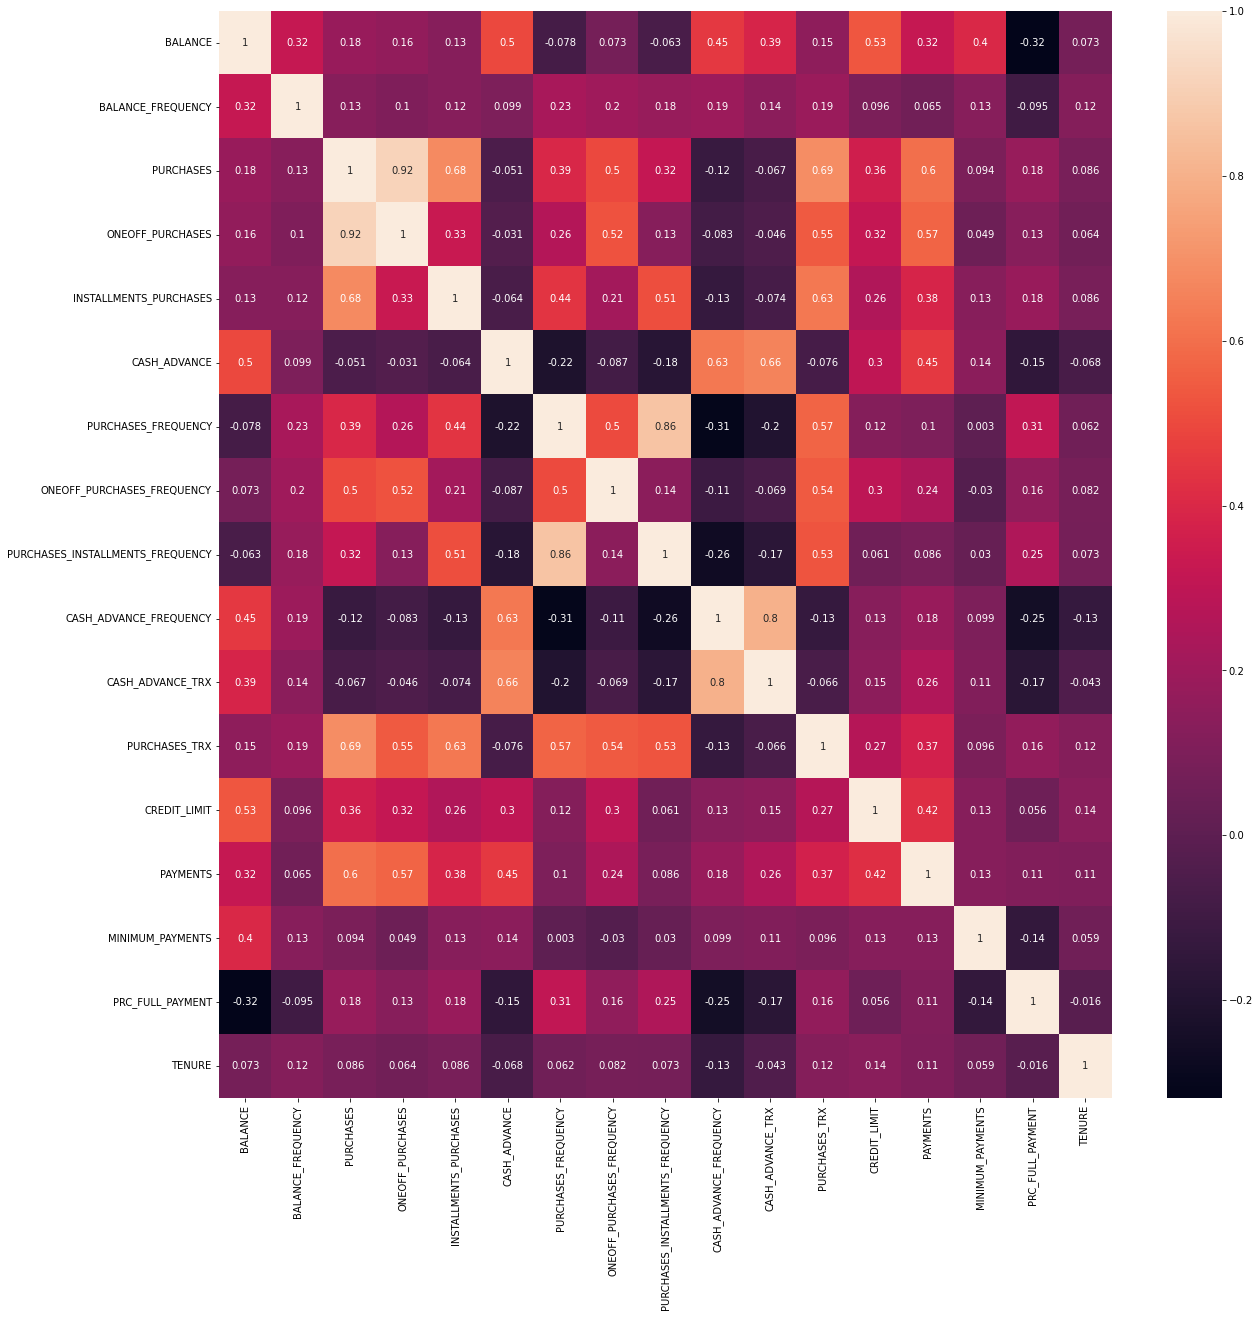

In [ ]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

Como nós temos valores entre -1 e 1, quanto mais próximo dessas extremidades, mais forte é a correlação entre os atributos.

Sendo assim, já conseguimos perceber a correlação positiva forte entre:

- Frequência de compras x frequência de compras parceladas (0.86)

- Compras x compras à vista (0.92)

E as negativamente correlacionadas também:

- Frequência do saque limite do cartão x frequência de compras (-0.31)

- Frequência do saque limite do cartão x pagamento total da fatura (-0.25)



---



# Definição do número de clusters usando o Elbow Method

Para criarmos os grupos, vamos utilizar o **algoritmo k-means**, um dos mais utilizados quando o objetivo é fazer agrupamento de dados (clustering).

Através dele vamos **agrupar** os registros baseado em **atributos similares**, por meio do **cálculo da distância euclidiana**.

Mas como não sabemos quantos grupos de clientes temos que definir, aplicaremos o **Elbow Method** para definirmos o **número ideal de grupos** (clusters) de acordo com a base de dados.

Começamos analisando os valores mínimo e máximo de um atributo, para termos a noção da distância/diferença de escala entre os valores :

In [ ]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

Quando há uma grande diferença como vemos acima, é importante colocarmos os dados na mesma escala ao utilizarmos esse algoritmo k-means, que faz o cálculo exatamente dessa distância.

In [ ]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

vamos conferir os demais dados :

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Com todos os dados já escalonados, vamos fazer os testes com 1, 2, 3,... grupos e calcular o WCSS com cada um.

Nesse caso vamos fazer o teste calculando os valores de 1 até 20 clusters, e através da análise definirmos qual é o número ideal de grupos.

In [ ]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [ ]:
print(wcss_1)

[152149.99999999983, 127785.02078035074, 111986.69806610125, 99073.93826774803, 91503.27890640413, 84851.17744662083, 79576.93054527177, 74491.95023870424, 69857.33300370764, 66502.43878188572, 63632.74228518273, 61357.92158339328, 59174.42068132131, 57480.31046604096, 56305.523413302624, 54530.49088546649, 53196.68101349006, 51885.49213781643, 50645.749986056544]


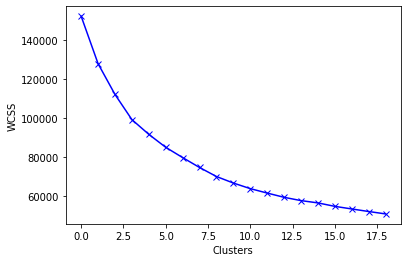

In [ ]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

Podemos observar que até o cluster 8 temos, de certa forma, uma queda acentuada. E do 8 adiante o gráfico já segue uma forma mais linear, já não há mais uma diferença muito grande.

Com isso, concluimos que o número ideal de clusters é entre 8 e 7, ou seja, a análise vai acontecer nessa faixa de clusters.

# Agrupamento com k-means

Vamos testar com o número 8 de clusters, treinando o algoritmo k-means para encontrar os centróides, calcular as médias, até colocar cada um dos registros da base de dados em um dos 8 grupos :

In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

Através do labels vamos visualizar a que grupo cada cliente pertence e depois a quantidade de clientes por grupo:

In [ ]:
labels, len(labels)

(array([2, 3, 4, ..., 0, 0, 0], dtype=int32), 8950)

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 628, 2025, 2820,  901, 1257, 1185,   55,   79]))

Agora temos que calcular os centróides de cada grupo, isto é, o valor da média dos atributos de cada registro do grupo :

In [ ]:
kmeans.cluster_centers_

array([[-3.34842951e-01, -3.43573330e-01, -2.84230857e-01,
        -2.08737048e-01, -2.88210673e-01,  6.56856070e-02,
        -1.97105612e-01, -2.71925821e-01, -2.29662138e-01,
         3.04677256e-01, -1.69478594e-03, -3.85258052e-01,
        -5.57568442e-01, -3.90389516e-01, -2.09716594e-01,
         1.37561700e-02, -3.19466546e+00],
       [-3.80580296e-01,  3.29278476e-01, -3.96443729e-02,
        -2.31356353e-01,  3.31138339e-01, -3.68447817e-01,
         9.82814163e-01, -3.47823867e-01,  1.17358589e+00,
        -4.76762776e-01, -3.62242164e-01,  1.69897122e-01,
        -2.73513914e-01, -2.23186182e-01, -1.09956108e-01,
         3.16939871e-01,  2.51453178e-01],
       [-1.05183230e-03,  4.01240790e-01, -3.40657573e-01,
        -2.21258326e-01, -3.98878945e-01, -1.13052333e-01,
        -8.03558443e-01, -3.30108253e-01, -7.50617529e-01,
         7.09816849e-02, -5.12248186e-02, -4.62196531e-01,
        -3.04688043e-01, -2.48428215e-01, -6.51606855e-02,
        -4.51834307e-01,  2.7

Acima temos os 8 grupos e dentro de cada um nós temos as médias de cada atributo. Traduzindo, nós temos as médias do saldo da conta corrente, das compras à vista, das compras à prazo, e por ai vai.

Partiremos então para a criação de um dataframe com esses dados para uma análise mais interessante :

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.334843,-0.343573,-0.284231,-0.208737,-0.288211,0.065686,-0.197106,-0.271926,-0.229662,0.304677,-0.001695,-0.385258,-0.557568,-0.390390,-0.209717,0.013756,-3.194665
1,-0.380580,0.329278,-0.039644,-0.231356,0.331138,-0.368448,0.982814,-0.347824,1.173586,-0.476763,-0.362242,0.169897,-0.273514,-0.223186,-0.109956,0.316940,0.251453
2,-0.001052,0.401241,-0.340658,-0.221258,-0.398879,-0.113052,-0.803558,-0.330108,-0.750618,0.070982,-0.051225,-0.462197,-0.304688,-0.248428,-0.065161,-0.451834,0.272675
3,1.627389,0.393036,-0.206541,-0.148658,-0.215334,1.989468,-0.459434,-0.185682,-0.408918,1.925473,1.924289,-0.240341,0.996415,0.828212,0.367551,-0.389097,0.070408
4,0.141276,0.430789,0.957835,0.906975,0.598497,-0.307300,1.099645,1.879504,0.545342,-0.407744,-0.317060,1.216245,0.716392,0.399590,-0.050883,0.465515,0.307178
5,-0.702092,-2.138285,-0.307593,-0.231057,-0.302689,-0.322177,-0.548811,-0.429577,-0.441582,-0.520540,-0.375620,-0.417098,-0.172468,-0.203637,-0.257310,0.295028,0.199386
6,1.135598,0.469242,-0.074806,-0.296769,0.367637,-0.042415,-0.071366,-0.559998,0.167464,-0.152910,-0.047119,0.078970,-0.095920,-0.076995,9.436581,-0.520371,0.292749
7,1.395997,0.410728,7.216513,6.424562,5.257658,0.022162,1.080082,1.907943,1.027240,-0.285268,-0.103238,4.796145,2.208638,4.995947,0.721587,0.853418,0.332303


Como esses valores acima são decorrentes da padronização que fizemos anteriormente, para utilizarmos o algoritmo k-means, vamos transformá-los em dados reais para entender cada um dos clusters.

Faremos o processo inverso para retornarmos aos valores originais :

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,867.527490,0.795881,395.941226,245.976624,150.442309,1116.616899,0.411243,0.121337,0.273164,0.196113,3.237261,5.133758,2465.787340,603.004456,375.470865,0.157738,7.242038
1,772.329067,0.955274,918.504020,208.433210,710.511936,206.218828,0.884801,0.098695,0.830850,0.039739,0.776790,18.932840,3499.293927,1087.041725,607.958472,0.246414,11.853827
2,1562.285528,0.972321,275.384679,225.193867,50.366364,741.795089,0.167844,0.103980,0.066123,0.149348,2.899255,3.221355,3385.869694,1013.968513,712.352313,0.021561,11.882228
3,4951.748564,0.970377,561.926515,345.695316,216.344040,5150.878965,0.305957,0.147065,0.201923,0.520451,16.380688,8.735849,8119.816366,4130.737625,1720.769404,0.039910,11.611543
4,1858.528496,0.979321,3049.634105,2097.830000,952.281432,334.449154,0.931691,0.763150,0.581170,0.053550,1.085123,44.941130,7100.976351,2889.918709,745.625916,0.289870,11.928401
5,103.128672,0.370731,346.028685,208.929612,137.349325,303.250250,0.270086,0.074307,0.188941,0.030979,0.685497,4.342327,3866.938823,1143.634107,264.555631,0.240005,11.784148
6,3928.125451,0.988430,843.379636,99.862000,743.517636,889.924775,0.461708,0.035399,0.430992,0.104545,2.927273,16.672727,4145.454545,1510.251238,22855.761083,0.001515,11.909091
7,4470.125318,0.974568,16421.396962,11255.894557,5165.502405,1025.346420,0.923840,0.771634,0.772689,0.078059,2.544304,133.924051,12530.379747,16195.919763,2545.834518,0.403325,11.962025


De acordo com análise feita, cheguei à conclusão de 4 grupos de clientes mais interessantes para o banco:


- **Grupo 7 (VIP/Prime)**: limite do cartão alto (12.530) e o mais alto percentual de pagamento da fatura completa (0.40). Aumentar o limite do cartão para icentivar o hábito de compras

- **Grupo 5 (Conservadores)**: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (103) e não sacam muito dinheiro do limite do cartão (303). 24% de pagamento da fatura completa do cartão de crédito

- **Grupo 3 (Consumistas)**: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (4.951) e sacam muito dinheiro do cartão de crédito (5.150), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.52). Pagam muito pouco a fatura completa (0.03)

- **Grupo 0 (clientes novos)**: clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (867)

Com essa definição dos grupos, vamos adicionar cada grupo para cada cliente:

In [ ]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


Para outra análise mais visual, ainda com relação aos grupos que foram gerados, além das médias, vamos gerar histogramas utilizando os grupos (clusters) :

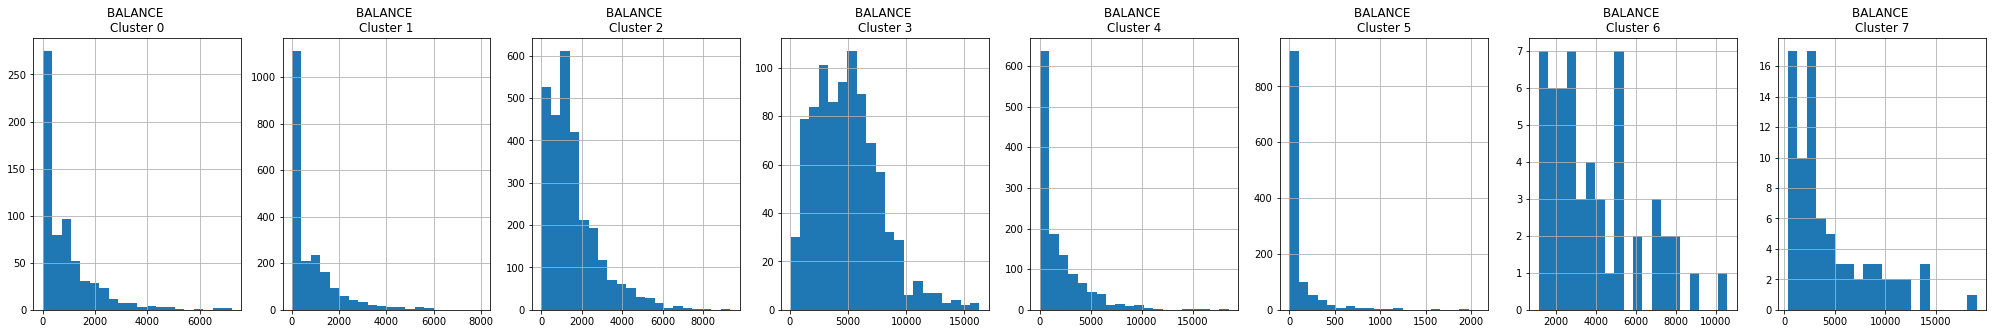

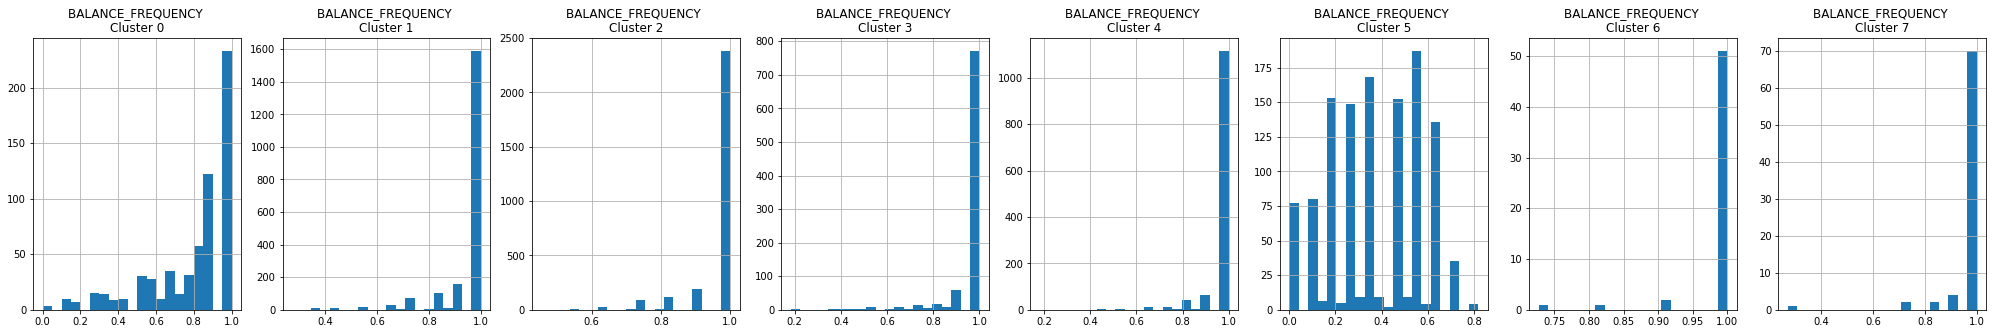

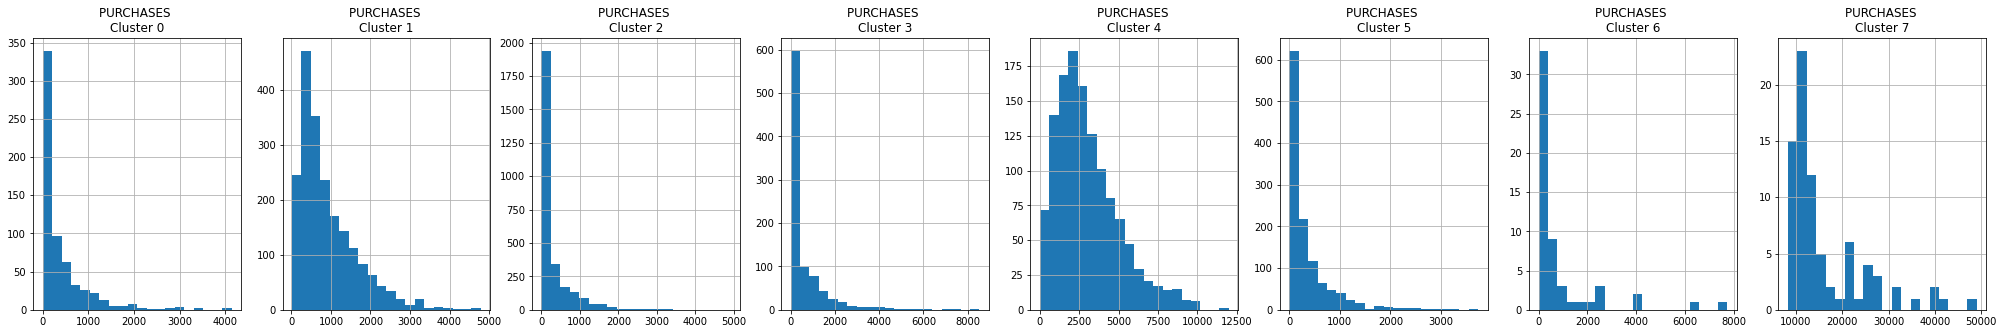

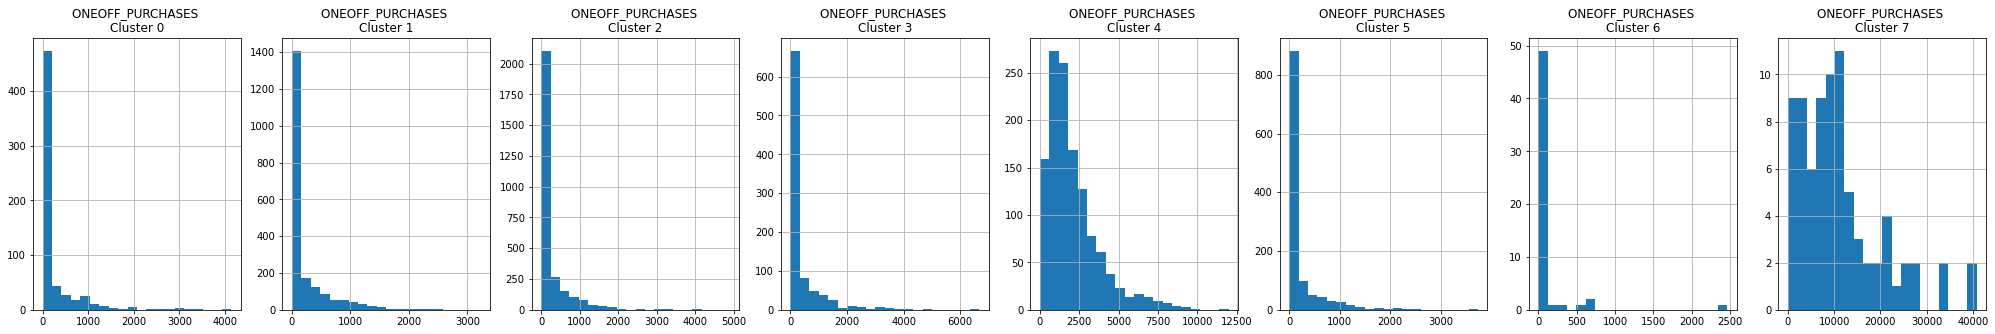

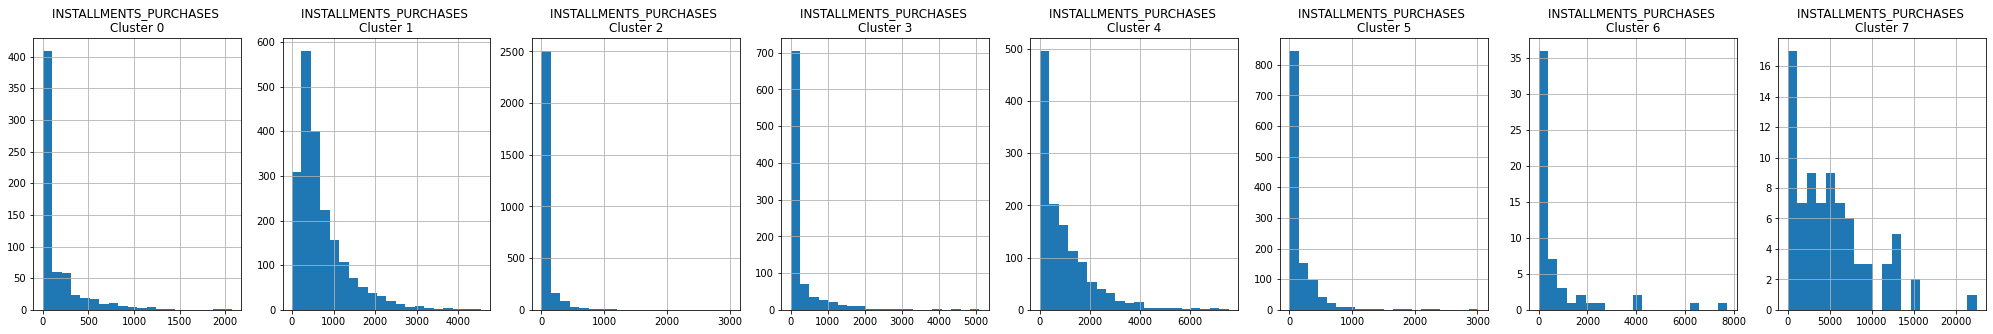

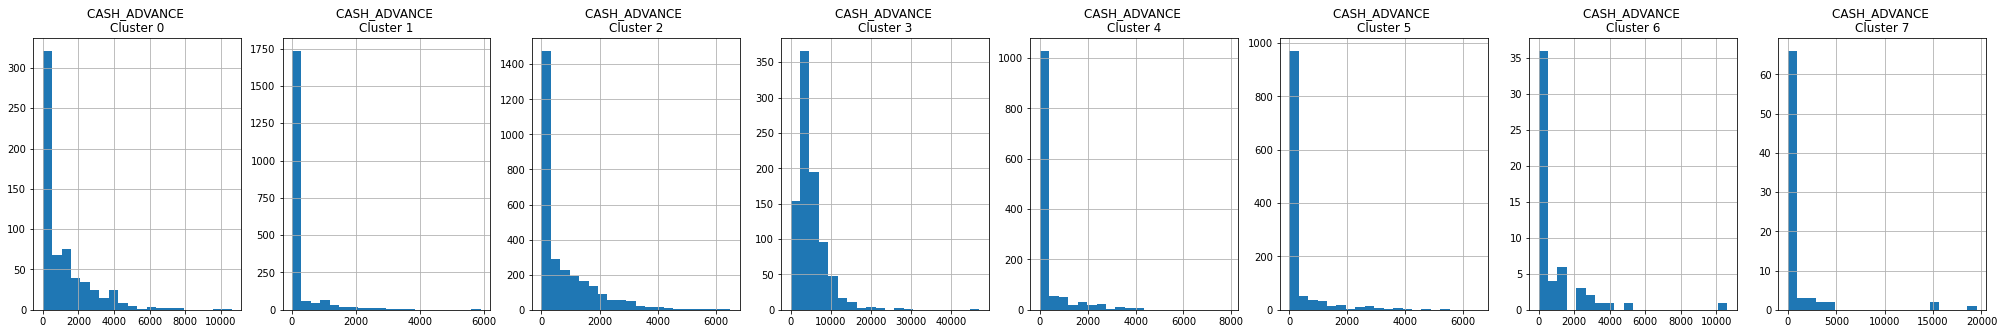

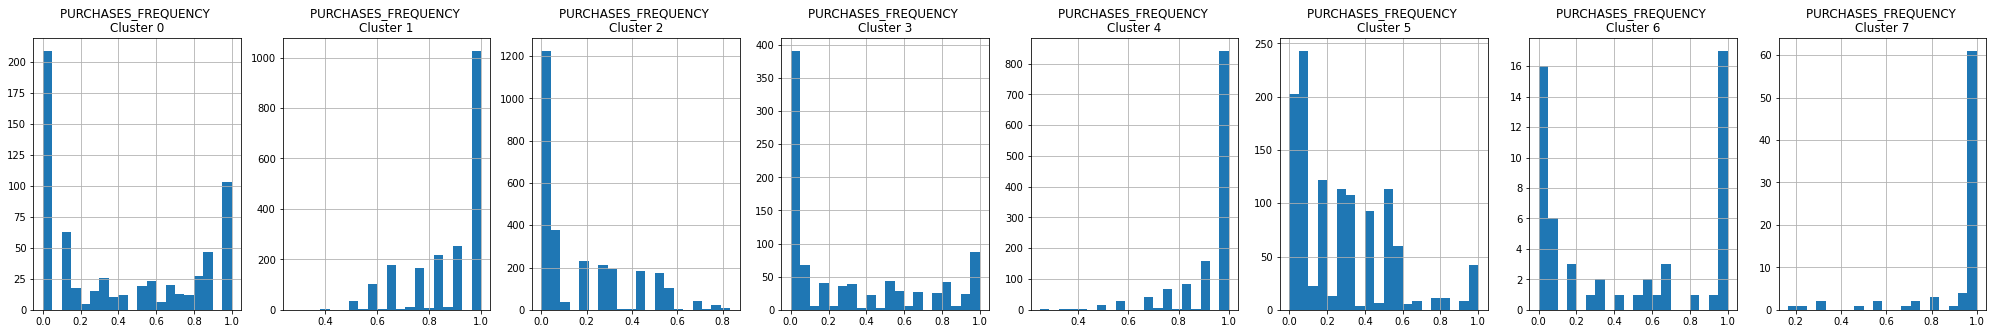

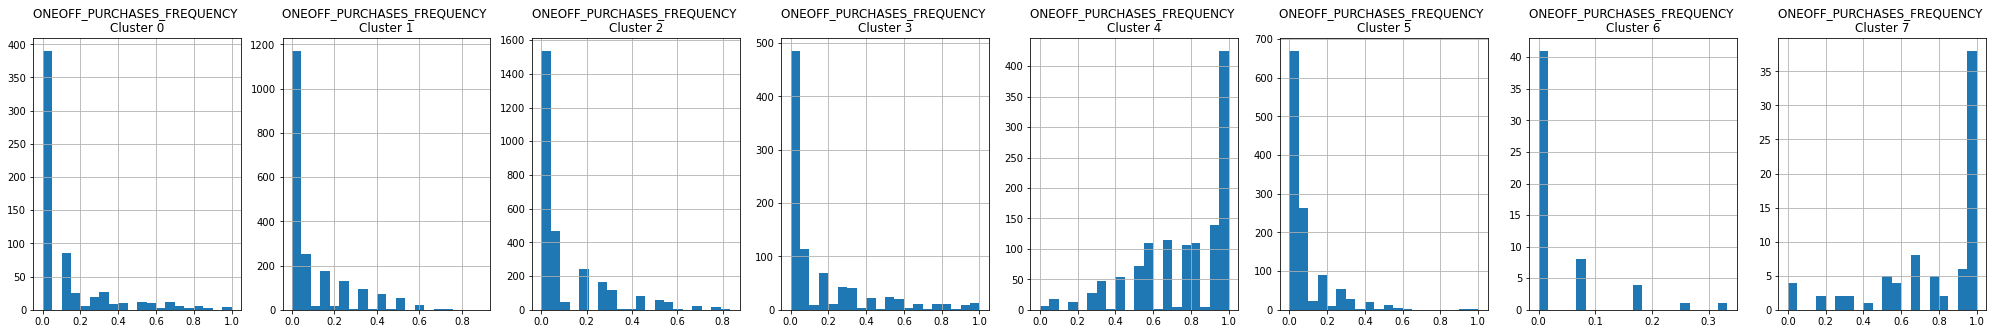

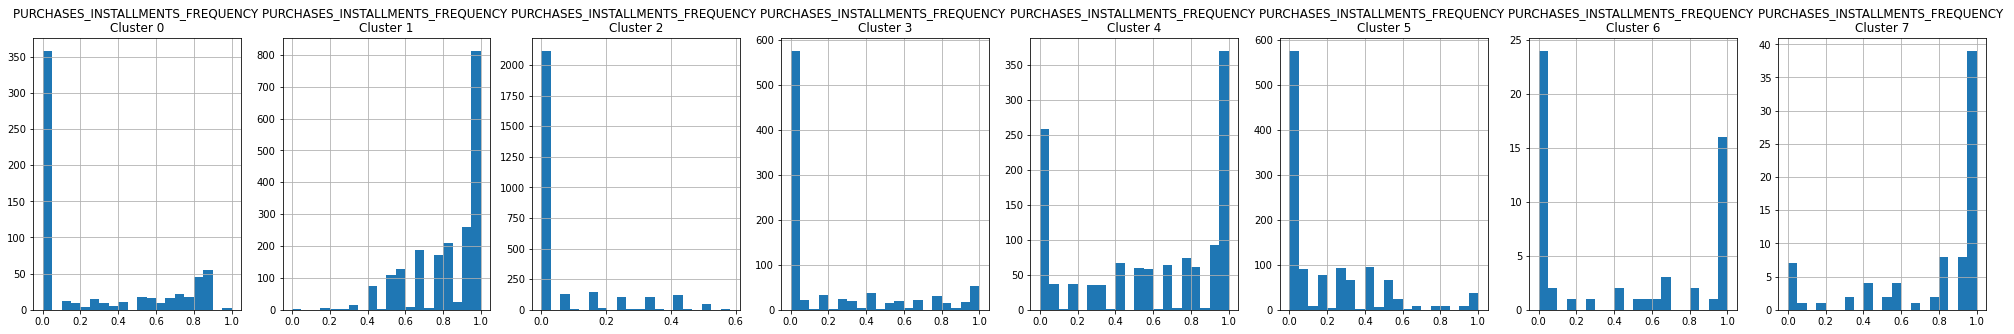

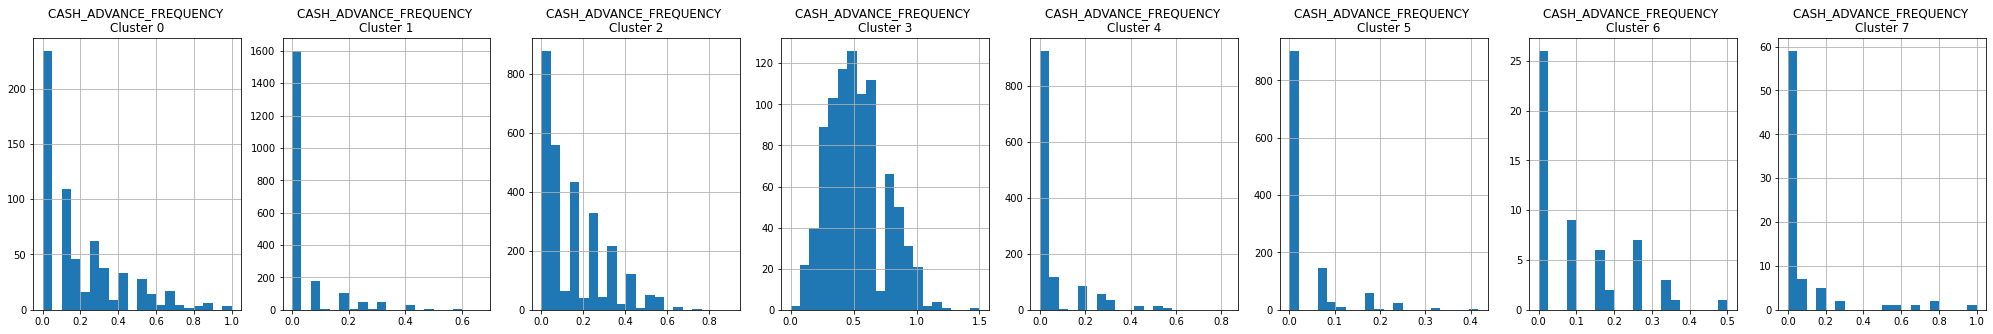

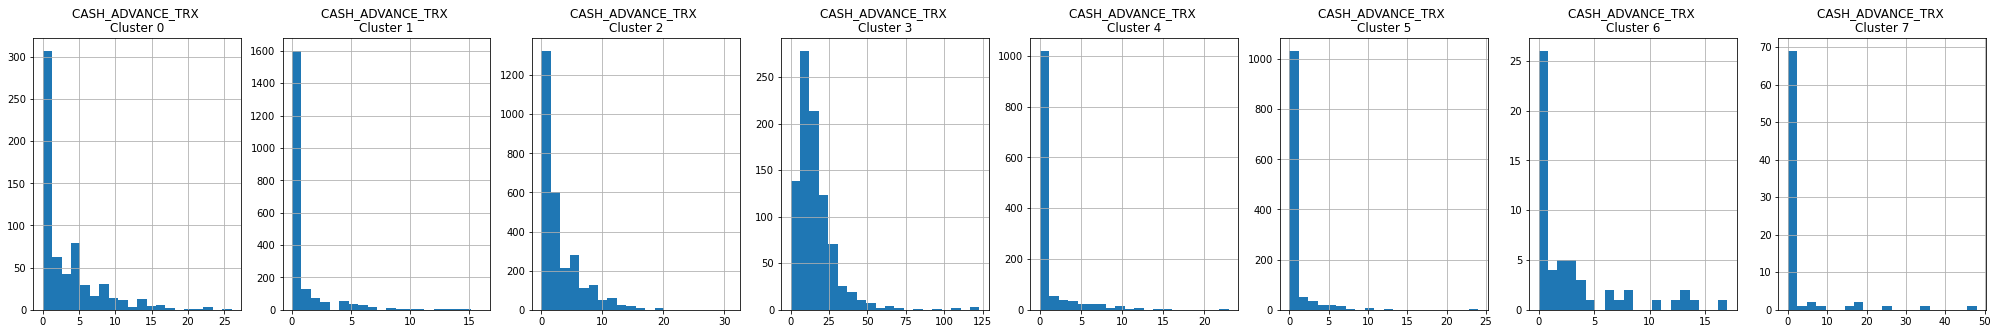

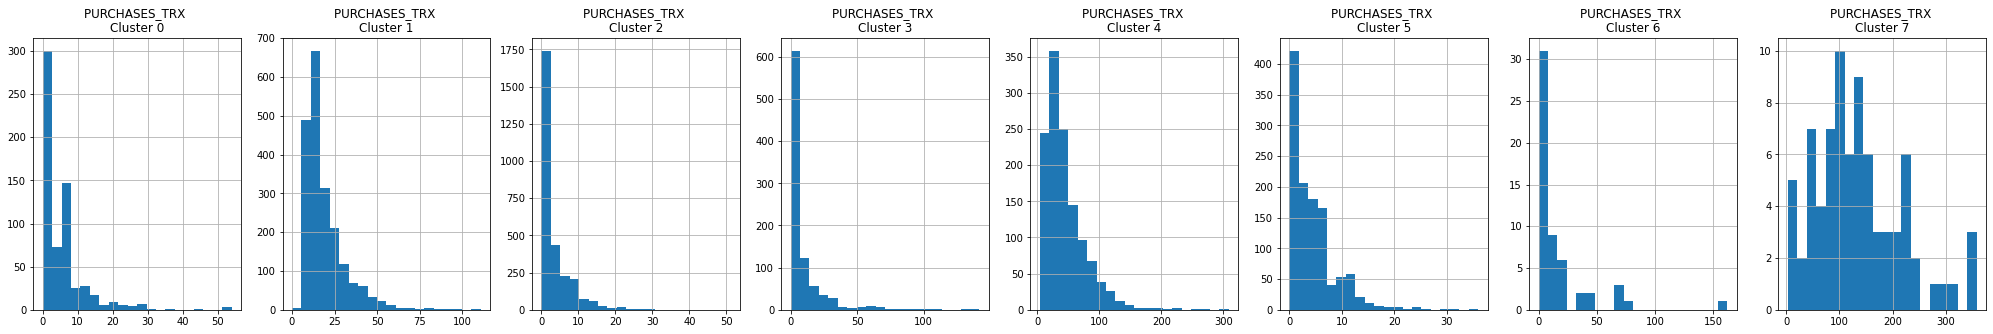

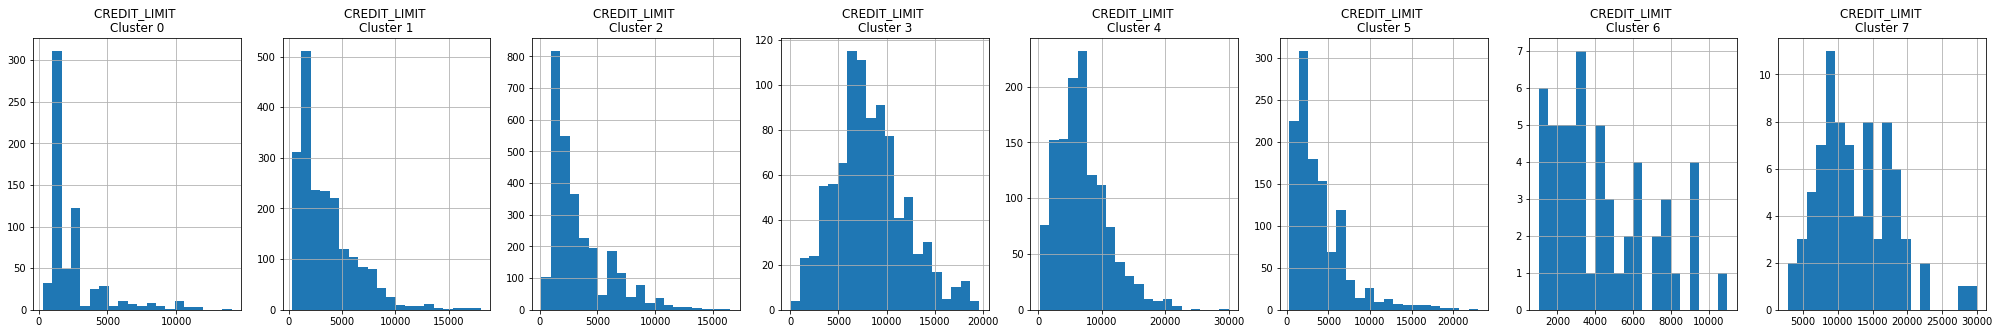

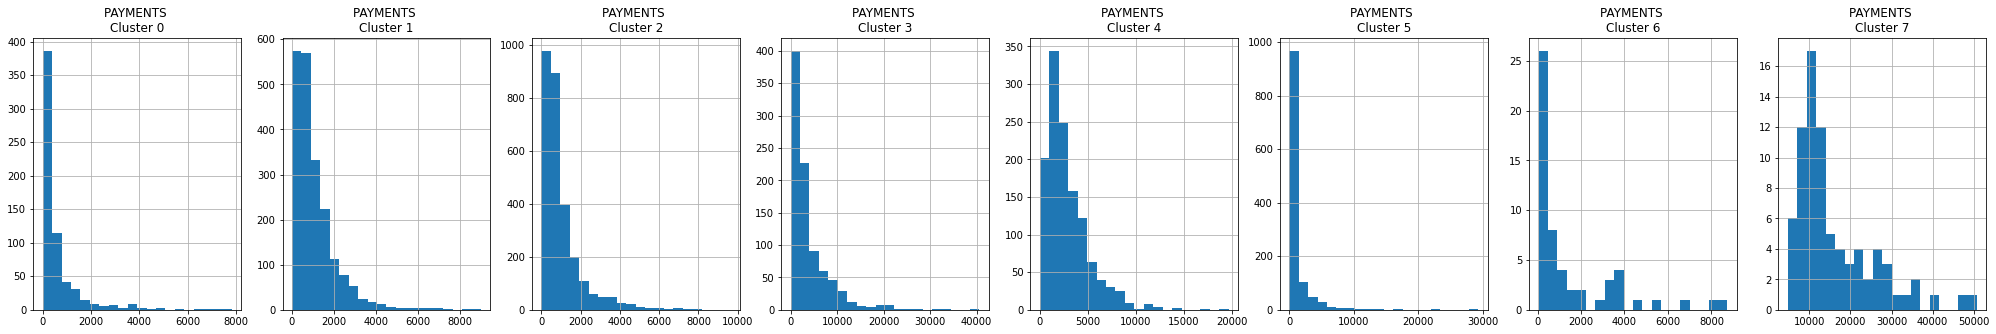

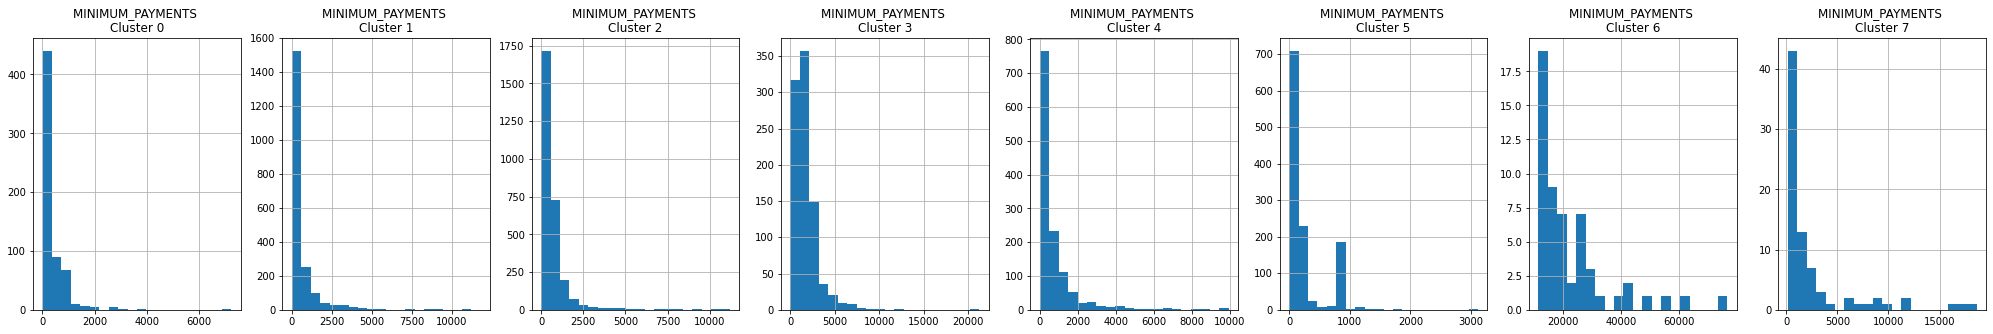

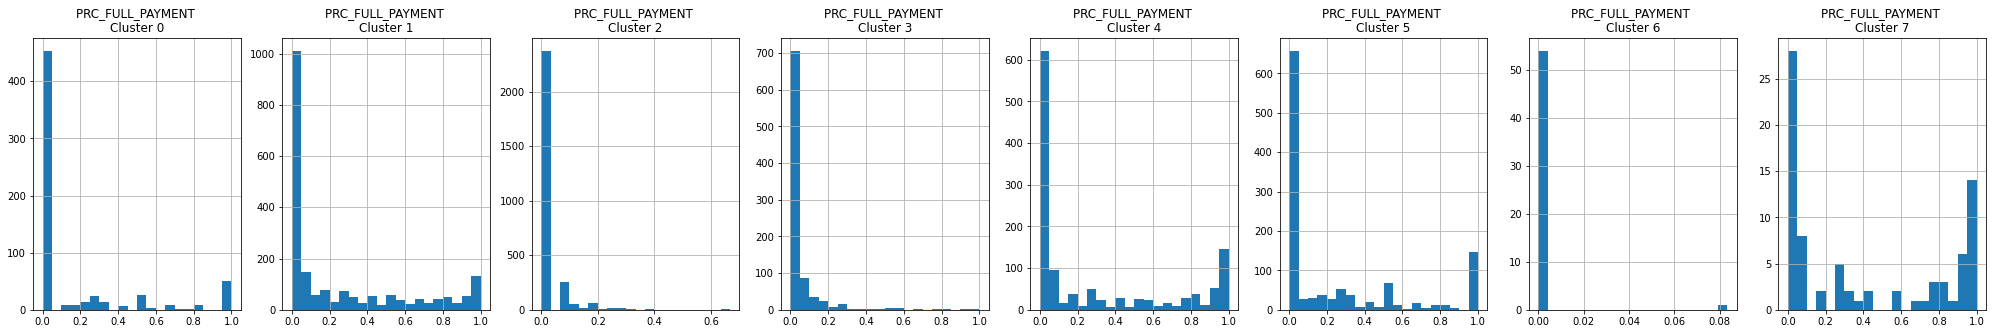

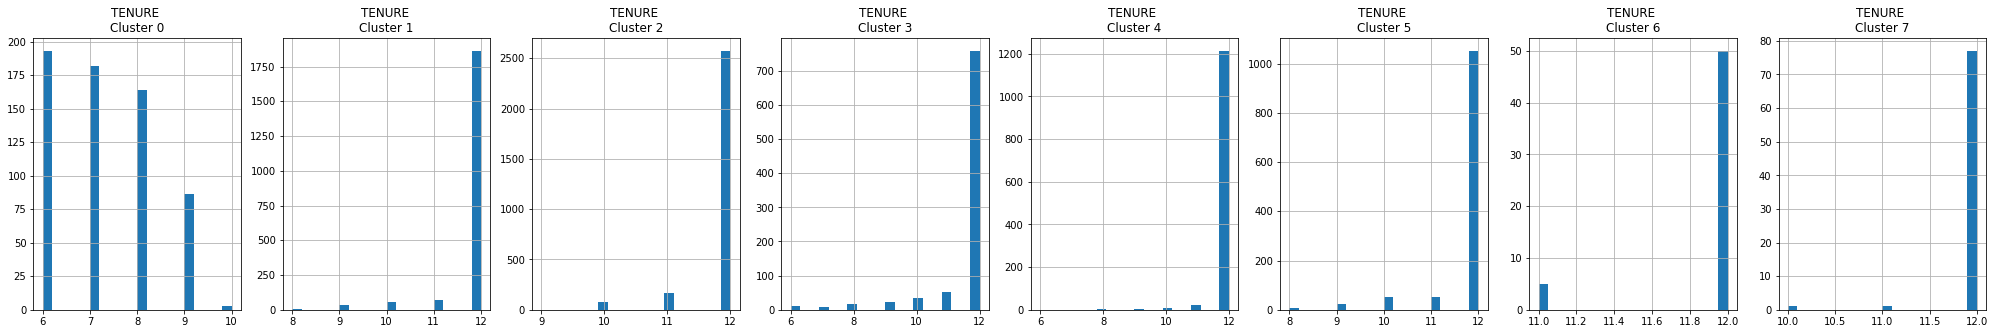

In [ ]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

Agora vamos simular como se fossemos enviar essa base de dados, em ordem de grupos, para o departamento de marketing e eles criarem as campanhas para cada grupo :

In [ ]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.0,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,0
8323,15.410246,0.571429,51.02,51.02,0.0,0.000000,0.142857,0.142857,0.0,0.000000,0,2,4000.0,72.309870,70.412367,0.000000,7,0
8322,403.311321,0.857143,208.00,208.00,0.0,438.543672,0.142857,0.142857,0.0,0.142857,1,1,4000.0,39.576673,133.729514,0.000000,7,0
1940,662.022698,0.875000,280.00,280.00,0.0,2276.320971,0.125000,0.125000,0.0,0.250000,2,1,3000.0,1914.038297,129.180504,0.142857,8,0
8318,2080.122570,0.777778,0.00,0.00,0.0,3014.915206,0.000000,0.000000,0.0,0.222222,7,0,3000.0,652.357962,506.798212,0.000000,9,0


In [ ]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1765,1377.812538,1.000000,14300.98,10394.67,3906.31,0.000000,1.000000,0.916667,0.916667,0.000000,0,55,18000.0,13535.67697,352.090849,1.000000,12,7
1447,8151.985277,1.000000,25615.07,25122.77,492.30,0.000000,1.000000,1.000000,0.583333,0.000000,0,56,17000.0,17575.20083,2465.465414,0.166667,12,7
5472,2306.698723,0.727273,12784.51,11246.07,1538.44,191.652876,0.666667,0.666667,0.333333,0.083333,1,68,6200.0,13705.00441,1310.291574,0.000000,12,7
2523,984.724235,1.000000,10243.48,4316.82,5926.66,0.000000,1.000000,0.333333,1.000000,0.000000,0,56,7500.0,11112.38396,252.899236,1.000000,12,7
591,8781.831676,1.000000,11674.64,9400.96,2273.68,0.000000,1.000000,1.000000,0.916667,0.000000,0,93,16000.0,10377.36120,2372.972810,0.000000,12,7


Vamos salvar esse arquivo para enviar em CSV, supondo que o departamento de marketing trabalhe com planilhas de excel :

In [ ]:
credit_ordered.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

Iremos gerar um gráfico, para visualizar melhor como esses grupos estão dispostos. Por termos muitas variáveis, aplicaremos redução de dimensionalidade gerando somente 2 componentes, ou seja, transformando as 18 características (atributos) em  somente 2.


In [ ]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221986, -1.0764504 ],
       [-1.13829277,  2.50648107],
       [ 0.96968195, -0.38354175],
       ...,
       [-0.92620388, -1.81078508],
       [-2.33655172, -0.65795931],
       [-0.55642335, -0.40046905]])

Vamos criar um novo DataFrame para colocarmos na terceira coluna a qual cluster cada um dos registros acima pertence :

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076450
1,-1.138293,2.506481
2,0.969682,-0.383542
3,-0.873627,0.043167
4,-1.599434,-0.688581


É difícil tentar interpretar esses dados das 2 colunas, pois eles foram obtidos através de vários cálculos matemáticos, combinando os 18 atributos. Por isso noeamos de 'pca1' e 'pca2'.

Faremos então a concatenação :

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076450,2
1,-1.138293,2.506481,3
2,0.969682,-0.383542,4
3,-0.873627,0.043167,2
4,-1.599434,-0.688581,2


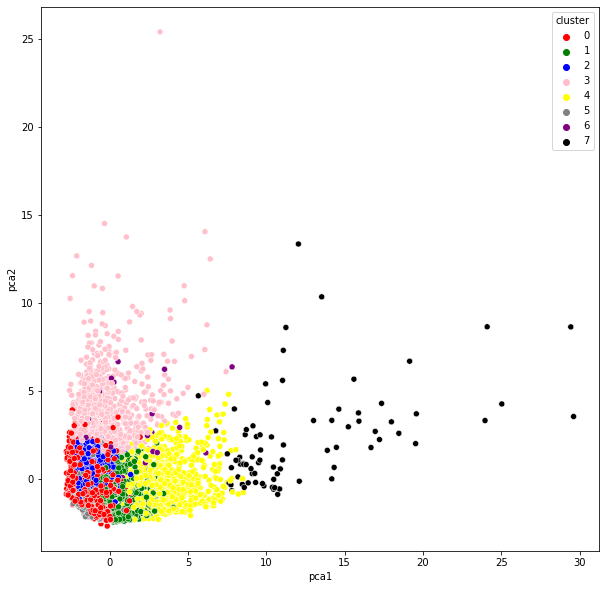

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette=['red','green','blue','pink','yellow','grey','purple','black'])

## Aplicação de Autoenconders

Podemos também, ao invés de utilizar o PCA, aplicarmos Autoencoders, que são um tipo de redes neurais artificiais para codificar dados, utilizando a mesma entrada e a mesma saída para comparar os resultados.

Nesse nosso caso, ele terá o mesmo objetivo do PCA, que é de reduzir a dimensionalidade dos dados. 

Entretanto iremos um pouco além aqui. Aplicaremos o K-means com a análise do Elbow Method novamente e o Autoencoders para encontrar as características mais correlacionadas e agrupá-las.

A ordem então será:

In [ ]:
# Autoencoders para reduzir de 18 atributos para 10 atributos
# Elbow para analisar quantos clusters iremos definir
# K-means para termos novos grupos
# PCA para visualizarmos tudo

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

Como temos poucos dados, e esses dados são tradicionais, vamos aumentar a dimensionalidade antes de diminuir, com valores definidos aleatoriamente:

In [ ]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [ ]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [ ]:
#criando a variável Autoencoder
autoencoder = Model(input_df, decoded)

In [ ]:
#criando a variável Encoder
encoder = Model(input_df, encoded)

Agora precisamos fazer o treinamento desse Autoencoder, passando os dados pelo processo de codificação e decodificação, para que a rede neural encontre o melhor conjunto de pesos e no final os dados decodificados sejam semelhantes aos que entraram.

In [ ]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 11s 35ms/step - loss: 0.2128
Epoch 2/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0801
Epoch 3/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0931
Epoch 4/50
280/280 [==============================] - 10s 35ms/step - loss: 0.0591
Epoch 5/50
280/280 [==============================] - 10s 34ms/step - loss: 0.0592
Epoch 6/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0497
Epoch 7/50
280/280 [==============================] - 9s 34ms/step - loss: 0.0383
Epoch 8/50
280/280 [==============================] - 10s 35ms/step - loss: 0.0376
Epoch 9/50
280/280 [==============================] - 10s 34ms/step - loss: 0.0311
Epoch 10/50
280/280 [==============================] - 9s 30ms/step - loss: 0.0313
Epoch 11/50
280/280 [==============================] - 10s 35ms/step - loss: 0.0368
Epoch 12/50
280/280 [==============================] - 10s 34ms/step - loss: 0.0406
Epoch 

In [ ]:
creditcard_df.shape

(8950, 17)

Vamos compactar esses dados :

In [ ]:
compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 4ms/step


In [ ]:
compact.shape

(8950, 10)

Comparando agora os dados originais com os compactados :

In [ ]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [ ]:
compact[0]

array([0.4615589 , 0.        , 0.        , 0.23198995, 0.        ,
       0.9999048 , 0.38433075, 0.7885273 , 0.13337965, 0.08367638],
      dtype=float32)

Com essa etapa concluída, voltaremos ao Elbow Method, dessa vez trabalhando em cima dessa nova base de dados :

In [ ]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

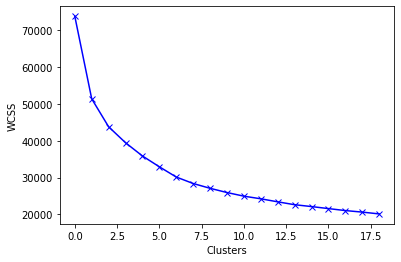

In [ ]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

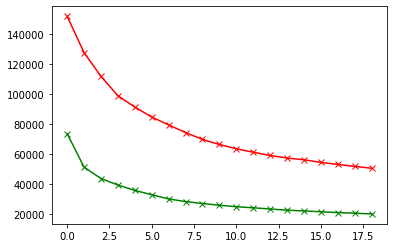

In [ ]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

Fazendo a comparação, observamos que quando nós reduzimos a dimensionalidade dos dados conseguimos definir um número menor de clusters.

Sendo assim, vamos definir 4 clusters nesse caso :

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [ ]:
labels = kmeans.labels_
labels, labels.shape

(array([3, 2, 3, ..., 2, 2, 1], dtype=int32), (8950,))

Para visualizarmos os dados reais, retornamos os valores originais :

In [ ]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


Agrupando :

In [ ]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.687794,-0.109769
1,1.111641,-1.245660
2,-1.066456,0.281075
3,0.235140,-0.361520
4,-1.752330,-0.114408


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.687794,-0.109769,3
1,1.111641,-1.245660,2
2,-1.066456,0.281075,3
3,0.235140,-0.361520,2
4,-1.752330,-0.114408,3


Vamos visualizar :

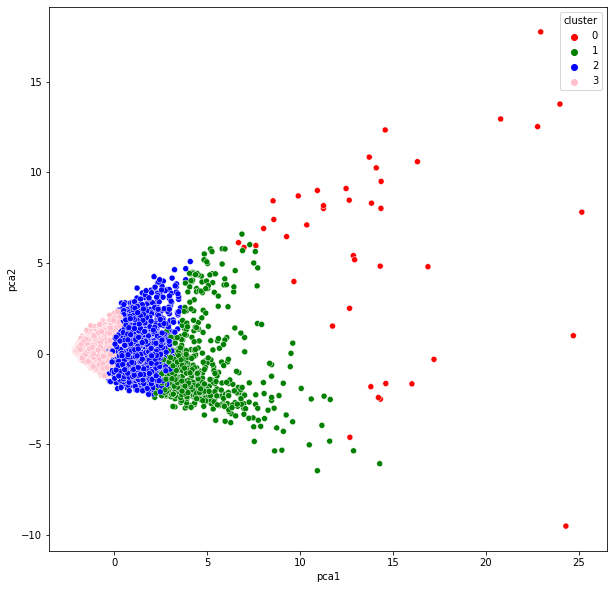

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette=['red','green','blue','pink'])

Observamos que conseguimos ter uma visualização agora muito mais clara do que na abordagem anterior, tendo mais consistência nesses grupos do que quando tínhamos 8.

E supondo, novamente, que vamos enviar para o departamento de marketing esses dados, de forma ordenada, seguimos :

In [ ]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
138,19043.138560,1.0,22009.92,9449.07,12560.85,0.00000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.57583,18621.013310,0.000000,12,0
1991,1513.075264,1.0,15704.04,12618.86,3085.18,0.00000,1.000000,0.916667,0.916667,0.000000,0,185,3000.0,14399.70318,310.712671,0.916667,12,0
5358,6372.182817,1.0,22101.78,22101.78,0.00,19513.47483,0.333333,0.333333,0.000000,0.666667,35,40,7500.0,39461.96580,6764.853481,0.250000,12,0
854,4419.302940,1.0,12551.95,10901.24,1650.71,14896.54051,1.000000,0.666667,1.000000,0.500000,19,122,17000.0,31698.41902,1448.585054,0.416667,12,0
2970,5968.583246,1.0,22381.97,19150.02,3231.95,0.00000,1.000000,1.000000,0.583333,0.000000,0,87,14500.0,20343.28681,1966.191831,0.000000,12,0


In [ ]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4722,5976.796897,1.000000,1194.52,0.00,1194.52,790.205561,0.416667,0.000000,0.333333,0.333333,6,15,6000.0,2722.095294,2670.210603,0.0,12,3
4721,6950.583049,1.000000,400.98,0.00,400.98,259.046858,0.500000,0.000000,0.416667,0.083333,1,6,12500.0,2008.360568,1704.533297,0.0,12,3
4719,1994.694769,1.000000,248.75,248.75,0.00,1016.518185,0.166667,0.166667,0.000000,0.083333,1,2,6000.0,568.025868,562.654151,0.0,12,3
4155,3494.152843,1.000000,2217.87,578.06,1639.81,2452.383654,1.000000,0.250000,0.916667,0.250000,10,59,6500.0,2125.932737,1672.557449,0.0,12,3
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,3


In [ ]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')

<ipython-input-134-0bdd89c631ee>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_cluster_ordered.to_excel('cluster_ordereded.xls')
